# COSC 3337 - Homework 2 - Ujwal Joshi
Your task for this homework will be to perform exploratory data analysis and predict if a
person is prone to a heart attack (0 or 1). 

Answer the following: Is this a classification or regression task and why?

**answer:** This is a classification task because the target output is categorical.

## Data
The dataset that we will be using for this homework contains the following information:
- `age`
- `sex`
- `cp`: chest pain type
- `trtbps`: resting blood pressure
- `chol`: cholesterol
- `fbs`: fasting blood sugar
- `restecg`: resting electrocardiographic results
- `thalachh`: maximum heart rate achieved
- `exng`: exercise induced angina
- `oldpeak`: previous peak
- `slp`: slope
- `caa`: number of major vessels
- `thall`: thal rate
- `output`: target/labels 0 or 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Step 1
Begin by importing the data and displaying the first 5 observations.  

Answer the following using Pandas:
- How many observations are there in total?
- Are there any missing values?
- How many unique values are in each column?
- Which columns will you treat as categorical, which will you take as continuous, and why?

In [2]:
# displaying first 5 observations
heart_df = pd.read_csv('data.csv')
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


How many observations are there in total?

In [3]:
# total observations:
print(f'There are {heart_df.shape[0]} total observations.')

There are 303 total observations.


Are there any missing values?

In [4]:
# missing values
# heart_df.info()
heart_df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

How many unique values are in each column?

In [5]:
unique_vals_pd = pd.DataFrame({
    'Unique Value Count': heart_df.apply(lambda col: len(col.unique())),
    'Unique Values': heart_df.apply(lambda col: col.unique())
})

unique_vals_pd

,Unique Value Count,Unique Values
age,41,"[63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 5..."
sex,2,"[1, 0]"
cp,4,"[3, 2, 1, 0]"
trtbps,49,"[145, 130, 120, 140, 172, 150, 110, 135, 160, ..."
chol,152,"[233, 250, 204, 236, 354, 192, 294, 263, 199, ..."
fbs,2,"[1, 0]"
restecg,3,"[0, 1, 2]"
thalachh,91,"[150, 187, 172, 178, 163, 148, 153, 173, 162, ..."
exng,2,"[0, 1]"
oldpeak,40,"[2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, ..."


Which columns will you treat as categorical, which will you take as continuous, and why?  
  
**answer:**  
I will treat the following variables as continuous:
- age
- trtbps
- chol
- thalachh
- oldpeak
  
`age` is typically a range of values on a continous scale so it makes sense to treat it as continuous. Bloot pressure and cholestrol (`trtbps` and `chol`) are measured on continuous scales, and `thalachh` is the maximum heart *rate* implying that it is also continous. `oldpeak` can be considered continuous since it representes a previous measurement on a continuous quantitative scale.

I will treat the following variables as categorical:
- sex
- cp
- fbs
- restecg
- exng
- slp
- caa
- thall  

`sex`, `fbs`, and `exng` are binary variables representing the presence or absence of something and thus should be treated as categorical. Similarly `cp`, `restecg`, `slp`, `caa`, and `thall` are variables that represent different categories of results at differing and increasing severities or weights, implying that these are likely ordinal and thus should be treated as categorical variables.

## Step 2
Create a plot of your target variable on the x-axis and counts on the y-axis.

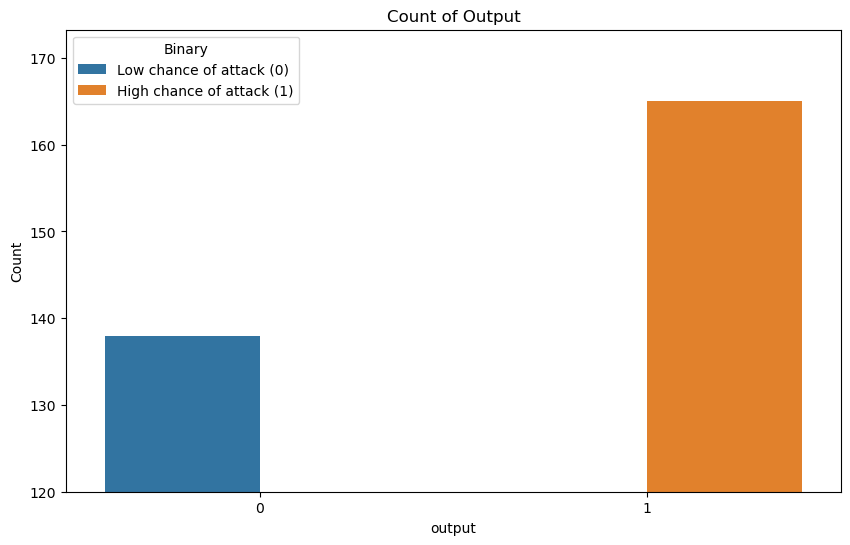

In [6]:
plt.figure(figsize=(10, 6))
sb.countplot(x='output', data=heart_df, hue='output')

plt.ylabel('Count')
plt.title('Count of Output')

plt.legend(title='Binary', labels=['Low chance of attack (0)', 'High chance of attack (1)'])
plt.ylim(120, None)

plt.show()


Answer the following:  
Is the dataset balanced? In other words, is there an equal representation of people prone to heart attacks and those who are not.  
**answer:**  no, there are far more people who are prone to heart attacks represented in this dataset compared to those who are not.

Is working with a balanced dataset important? Why or why not?  
**answer:**  Working with a balanced dataset could be important since it might help prevent the model from becoming biased towards one class of the output.

How can we deal with an imbalanced dataset?  
**answer:**  We could use techniques like k-fold cross-validation to ensure that each fold preserves the class distribution, providing more reliable estimates of model performance.

### Step 3
Create a count plot for *each* of your categorical variables. That is, the variable on the x-axis and counts on the y-axis.  

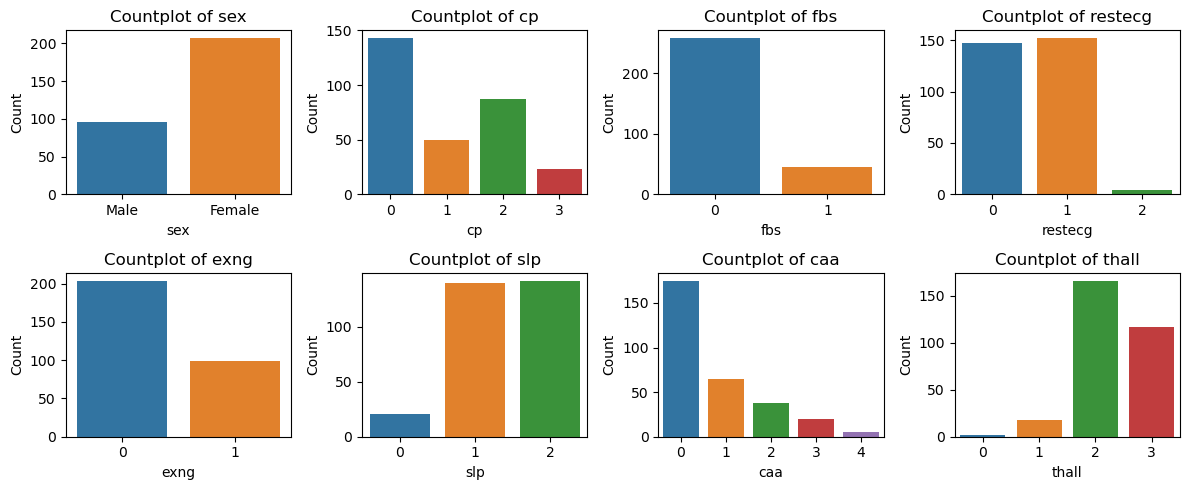

In [7]:
categorical_vars = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall"]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 5))

c = 0
for i, variable in enumerate(categorical_vars):
    r = i // 4
    sb.countplot(x=variable, data=heart_df, ax=axes[r][c])

    if(r == 0 and c == 0):
        axes[r][c].set(xticklabels = (['Male', 'Female']))

    axes[r][c].set_xlabel(variable)
    axes[r][c].set_ylabel('Count')
    axes[r][c].set_title(f'Countplot of {variable}')

    c = c + 1 if c < 3 else 0

plt.tight_layout()
plt.show()

Answer the following:  
What can you conclude from the plots you created? Are there any interesting findings?  

**answer:** There are far more samples for females in this dataset than males, further a majority of people in this dataset have 0 number of major blood vessels. A slope of 1 and 2 are relatively common (but not a slope of 0) and similarly the resting electrocardiographics results of 1 and 2 are also very common (but not a result of 2). Most people in this dataset have a thall rate of type 2 and 3. Furthermore, most do not have fasting blood sugar or exercise induced enigma (though there is a higher proportion of people who do have `exng` when compared to those that have `fbs`). An interesting thing to note is that most people within this dataset have a chest paint type of 0. As was noted earlier, the output is imbalanced and has a higher proportion of people who have a high chance of an attack compared to those that do not, it is interesting then that most people represented here do not seem to have chest pain (however it should also be noted that a significant portion of people do have a chest pain type of 2, and when combining types 1, 2, and 3 together it would be higher than 0. It is just intersting that a pain type of 0 has an outright majority when doing the countplot)

### Step 4
Create box plots by outcome for each of your continuous variables.

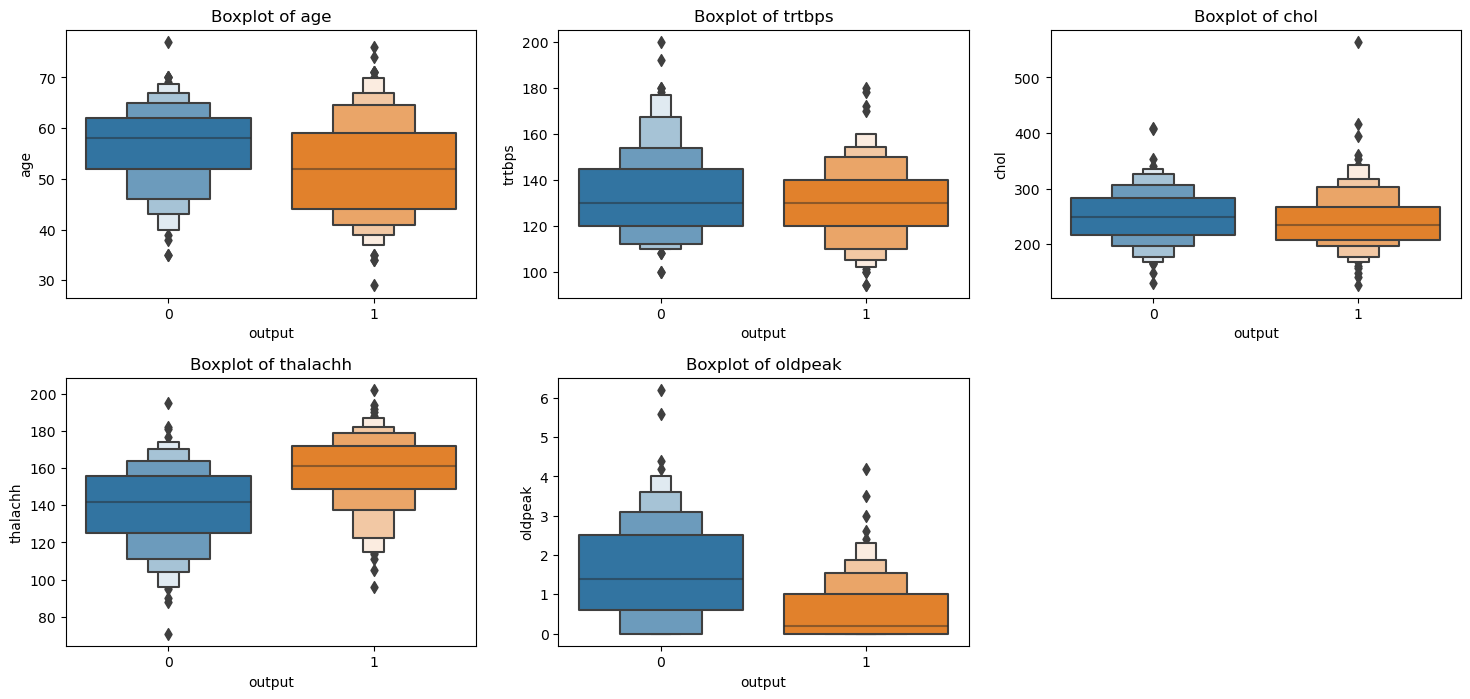

In [8]:
continuous_vars = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
fig.delaxes(axes[1, 2])
plt.subplots_adjust(hspace=0.3)

c = 0
for i, variable in enumerate(continuous_vars):
    r = i // 3
    c = 0 if i == 3 else c

    sb.boxenplot(x="output", y = variable, data=heart_df, ax=axes[r][c])
    axes[r][c].set_xlabel('output')
    axes[r][c].set_ylabel(variable)
    axes[r][c].set_title(f'Boxplot of {variable}')

    c += 1

plt.show()

Answer the following:  
What can you conclude from the plots you created? Are there any interesting findings?  

**answer:** An interesting this from observing the boxplots is that eben though resting blood pressure for output 0 (low chance of attack) has a higher range than 1 (high chance of attack) they both seem to have a relatively similar median. The data for `oldpeak` seems to be right skewed (moreso for output 1 than 0), and the maximum heart rate achieved for those with a high chance of an attack has a higher range and median than those with a lower chance (though it has more outliers than comprared to outpu 0). The data for age for those who have a low chance of attack is left skewed, and `chol` has more outliers for those with a high chance of an attack.

### Step 5
Create distribution plots by outcome for each of your continuous variables. 

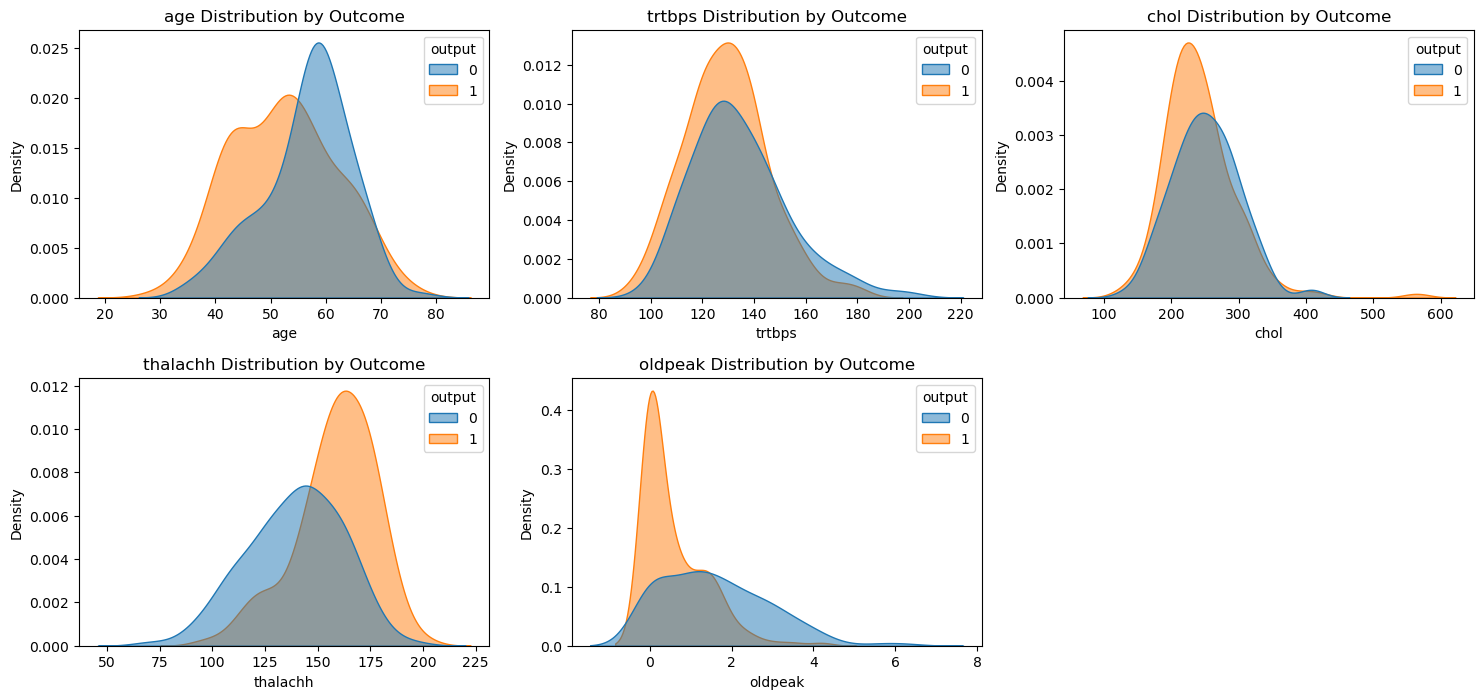

In [9]:
continuous_vars = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

# sb.kdeplot(data=heart_df, x=continuous_vars[1], hue="output", fill=True, alpha=.5, linewidth=1)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
fig.delaxes(axes[1, 2])
plt.subplots_adjust(hspace=0.3)

c = 0
for i, variable in enumerate(continuous_vars):
    r = i // 3
    c = 0 if i == 3 else c

    sb.kdeplot(data=heart_df, x=variable, hue="output", fill=True, alpha=.5, linewidth=1, ax=axes[r][c])
    axes[r][c].set_xlabel(variable)
    axes[r][c].set_ylabel('Density')
    axes[r][c].set_title(f'{variable} Distribution by Outcome')

    c += 1
    
plt.show()

Answer the following:  
What can you conclude from the plots you created? Are there any interesting findings?  

**answer:** The age distribution is more left skewed for an outcome of low chance of an attack, while a high chance is not as skewed and is more normally distributed which interestingly seems to imply that the chance of heart attack is not as affected by age since higher ages are more prevalent on the right side as depicted in the left skewed distribution for an outcome of 0. Both `trtbps` and `chol` have a right skewed distribution (for both outcomes), while `thalachh` is more left skewed however it is moreso for an outcome of 1 (high chance) than an outcome of 0. `oldpeak` is very right skewed for a high chance of an attack, while for an outcome of 0 it is only very slightly right skewed which seems to indicate that the previous peak is rather low for those with a high chance of an attack.

### Step 6
Create a heatmap of your data. 

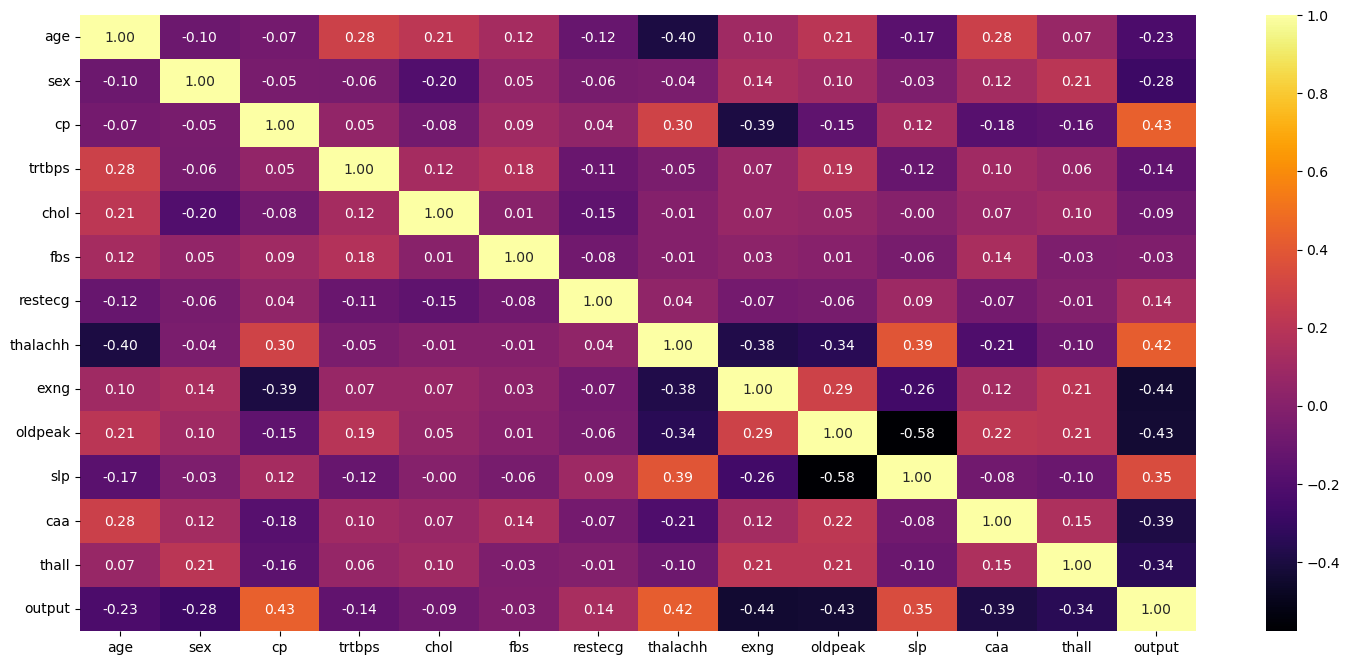

In [10]:
plt.figure(figsize=(18, 8))
sb.heatmap(heart_df.corr(), annot=True, cmap='inferno', fmt='.2f')
plt.show()

Answer the following:  
What can you conclude from the heatmap you created? Are there any interesting findings?  

**answer:** There does not seem to be any significant strong positive correlation between features, however `slp` has a very strong negative correlation with `oldpeak`. Other variables have some degree or positive or negative correlation with other variables or the output but none are above `0.6` or below `-0.5`.

### Step 7
Explore the data a bit on your own and include a few additional graphs of your choice. 

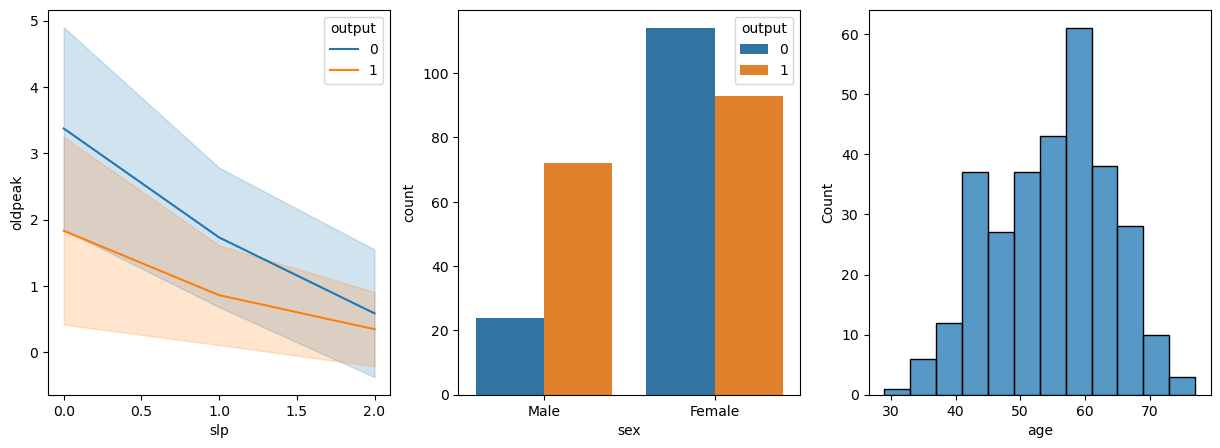

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sb.lineplot(data=heart_df, x='slp', y='oldpeak', hue='output', errorbar='sd', ax=axes[0])

sb.countplot(data=heart_df, x='sex', ax=axes[1], hue='output')
axes[1].set(xticklabels = (['Male', 'Female']))

sb.histplot(data=heart_df, x='age', ax=axes[2])

plt.show()

Answer the following:  
What can you conclude from the plots that you created? Did you find anything interesting?  

**answer:** Based on intuition gained by the heatmap, a lineplot was created to see what the correlation of oldpeak and slp looked like as well its overall trend, both variables move in a similar direction and further based on their convergence seem to be somewhat interactive. Further a countplot of `sex` with a hue towards `output` reveals that despite there being not as many samples for males compared to females in this dataset, a vast majority of the male samples are shown to have a higher chance of an attack while it is somewhat the opposite for the female samples. Finally, a histogram of `age` shows that a majority of this dataset has samples collected from people who are generally between the ages of 50 and (roughly) 65.

### Step 8
Answer the following:  
Name two different models that you can use to solve the problem statement.
- **answer**:  Two different models I could use for this classification task is logistic regression and naive bayes.

What is the difference between label encoding and one hot encoding, and when should you use one over the other?  
- **answer:**  Label encoding assigns a unique integer to each category and is suitable for ordinal data, while one hot encoding creates binary columns for each category and is ideal for nominal data. Label encoding introduces ordinal relationships between categories, while one hot encoding preserves independence between categories. You should use label encoding for ordinal data with a natural order and one hot encoding for nominal data without a meaningful order.

What is multicollinearity, and why do we care about it when creating models? How can we check to see if there’s significant multicollinearity in our data?  
- **answer:**  Multicollinearity occurs when predictors in a regression model are highly correlated, which can lead to unstable parameter estimates and difficulties in interpretation. To check for multicollinearity, we can analyze correlation coefficients or correlation heatmaps.

Why is scaling data important?  
- **answer:**  Scaling data ensures that all features contribute equally to the analysis, prevents variable dominance, and improves the performance of the model. It also aids in the interpretability of model coefficients and is also important to prevent overfitting.

For the two different models that you named earlier, are they using a parametric or non- parametric learning algorithms? What’s the difference? Suppose that we had missing values in our dataset. What are different ways we could handle them?  
- **answer:** Logistic regression and Naive Bayes are both examples of parametric learning algorithms, which assume a specific functional form for the relationship between predictors and the target variable and estimate parameters from the data. In contrast, non-parametric algorithms do not make strong assumptions about the data distribution and can adapt to its complexity. Various approaches exist to handle missing values in the dataset. These include deletion, which removes rows or columns with missing values but can lead to data loss and bias; imputation, which fills in missing values with substitutes like mean or median but may introduce bias.

### Step 9
Explore the data a bit on your own and include a few additional graphs of your choice.  

Choose 2 different models to solve the problem statement. Apply any necessary encoding, scaling, and train test splits to your data and construct the 2 models you selected. Provide a classification report and confusion matrix for both models. 

Do the following:  
Write a conclusion (~1 paragraph) detailing the main points you discovered while exploring the data. Also include things like: Did you scale your data? If so, which scaling method did you use and why? Is there a specific reason you selected these 2 models? How did the 2 models compare against each other? Note: Be sure to use cross validation when comparing models. See sklearn’s `cross_val_score` if you’re stuck.

### Logistic Regression

scaling continuous columns

In [13]:
from sklearn.preprocessing import StandardScaler

continuous_vars = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

heart_df_scaled = heart_df.copy()
scaler = StandardScaler()
heart_df_scaled[continuous_vars] = scaler.fit_transform(heart_df_scaled[continuous_vars])

heart_df_scaled.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


splitting the data into training and testing sets

In [18]:
from sklearn.model_selection import train_test_split

X_bc = heart_df_scaled.drop('output', axis=1)
y_bc = heart_df_scaled['output']

# 80% training, 20% testing
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, test_size=0.2, random_state=50)

creating the logistic regression model and predicting

In [21]:
from sklearn.linear_model import LogisticRegression

heart_bc_model = LogisticRegression()
heart_bc_model.fit(X_bc_train, y_bc_train)

y_bc_pred = heart_bc_model.predict(X_bc_test)

accuracy = np.mean(y_bc_pred == y_bc_test)
print("Accuracy:", accuracy)

Accuracy: 0.8032786885245902


confusion matrix

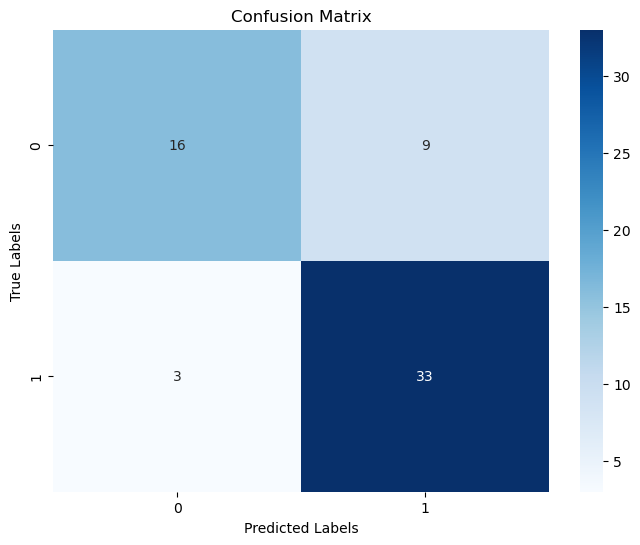

In [36]:
from sklearn.metrics import confusion_matrix

conf_matrix_bc = confusion_matrix(y_bc_test, y_bc_pred)

plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix_bc, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [37]:
print("True Positives:", conf_matrix_bc[1][1])
print("False Positives:", conf_matrix_bc[0][1])
print()
print("True Negatives:", conf_matrix_bc[0][0])
print("False Negatives:", conf_matrix_bc[1][0])

True Positives: 33
False Positives: 9

True Negatives: 16
False Negatives: 3


<u>Classification Report:</u>  

$\text{Precision}=\large\frac{\text{True Positives}}{\text{True Positives}+\text{False Positives}}=\frac{33}{33+9}=\normalsize 0.7857142857$  

$\text{Recall}=\large\frac{\text{True Positives}}{\text{True Positives}+\text{False Negatives}}=\frac{33}{33+3}=\normalsize 0.9166666667$  

$\text{F1 Score}=\large 2\times\frac{\text{Precision}\times\text{Recall}}{\text{Precision}+\text{Recall}}=2\times\frac{0.7857142857\times 0.9166666667}{0.7857142857+0.9166666667}=\normalsize 0.8461538462$  

The logistic regression model shows promising performance, with a precision of 0.79, indicating its accuracy in identifying true positive cases. Additionally, it achieves a high recall of 0.92, meaning its ability to capture the majority of individuals with a high risk of heart disease is rather good. The F1 score of 0.85 highlights the model's overall balance between precision and recall. This score suggests that the model achieves a good trade-off between accurately identifying positive cases and minimizing false alarms.

### Naive Bayes

splitting the data into training and testing sets

In [32]:
X_nb = heart_df.drop('output', axis=1)
y_nb = heart_df['output']

# 80% training, 20% testing
X_nb_train, X_nb_test, y_nb_train, y_nb_test = train_test_split(X_nb, y_nb, test_size=0.2, random_state=50)

creating the logistic regression model and predicting

In [35]:
from sklearn.naive_bayes import GaussianNB

heart_nb_model = GaussianNB()
heart_nb_model.fit(X_nb_train, y_nb_train)

y_nb_pred = heart_nb_model.predict(X_nb_test)

accuracy = np.mean(y_nb_pred == y_nb_test)
print("Accuracy:", accuracy)

Accuracy: 0.7868852459016393


confusion matrix

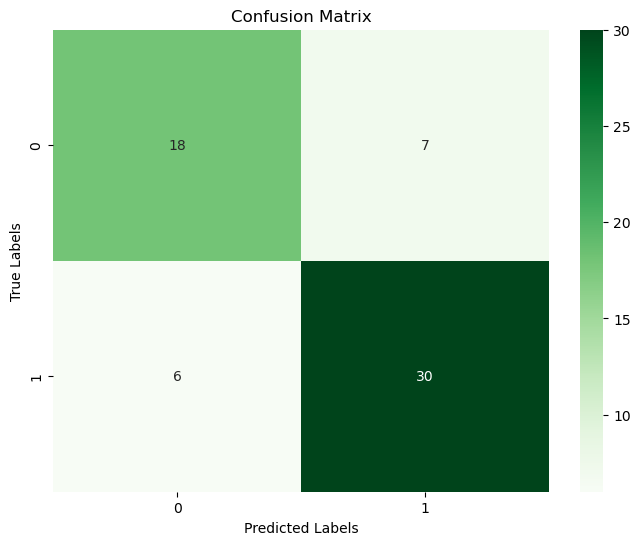

In [41]:
conf_matrix_nb = confusion_matrix(y_nb_test, y_nb_pred)

plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix_nb, annot=True, cmap='Greens', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [46]:
print("True Positives:", conf_matrix_nb[1][1])
print("False Positives:", conf_matrix_nb[0][1])
print()
print("True Negatives:", conf_matrix_nb[0][0])
print("False Negatives:", conf_matrix_nb[1][0])

True Positives: 30
False Positives: 7

True Negatives: 18
False Negatives: 6


<u>Classification Report:</u>  

$\text{Precision}=\large\frac{\text{True Positives}}{\text{True Positives}+\text{False Positives}}=\frac{30}{30+7}=\normalsize 0.8108108108$  

$\text{Recall}=\large\frac{\text{True Positives}}{\text{True Positives}+\text{False Negatives}}=\frac{30}{30+6}=\normalsize 0.8333333333$  

$\text{F1 Score}=\large 2\times\frac{\text{Precision}\times\text{Recall}}{\text{Precision}+\text{Recall}}=2\times\frac{0.8108108108\times 0.8333333333}{0.8108108108+0.8333333333}=\normalsize 0.8219178082$  

The Naive Bayes model has a precision of 0.81, the model accurately identifies approximately 81.08% of true positive cases, showcasing its good performance in classifying individuals with a high chance of heart disease. Additionally, achieving a recall of 0.83 indicates that the model successfully captures around 83.33% of all individuals with a high risk of heart disease, reflecting its ability to minimize false negatives. The model demonstrates a well-balanced trade-off between precision and recall with an F1 score of 0.82, suggesting its effectiveness.

### Conclusion

Using 5 fold cross validation to compare both models

In [54]:
from sklearn.model_selection import cross_val_score

heart_log_reg_scores = cross_val_score(heart_bc_model, X_bc, y_bc, cv=5)
heart_naive_bayes_scores = cross_val_score(heart_nb_model, X_nb, y_nb, cv=5)

model_cv_accuracies_pd = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes'],
    'Mean Accuracy': [heart_log_reg_scores.mean(), heart_naive_bayes_scores.mean()]
})

model_cv_accuracies_pd

,Model,Mean Accuracy
0,Logistic Regression,0.834809
1,Naive Bayes,0.805082


During the data exploration phase, several key insights emerged: the dataset exhibited significant class imbalance, with a higher prevalence of patients at high risk of attack compared to those not at risk, and all continuous variables displayed varying distributions and degrees of skewness. Thus, for logistic regression, data scaling was deemed necessary to address the impacts of unit differences across features. I utilized standard scaling (z-scores) to mitigate this issue. However, for the Naive Bayes model, scaling was intentionally omitted, as I wished to test the model's assumption of feature independence and observe its performance under such conditions. I chose Logistic Regression and Naive Bayes as I wished to see the differences in results of a discriminative and generative model. Both models demonstrated good performance, yet logistic regression exhibited a slight edge with a mean accuracy of 0.834809 over Naive Bayes' 0.805082, as determined through 10-fold cross-validation. Logistic Regression also had a slightly higher F1 score; however, interestingly, Naive Bayes had a higher precision than Logistic Regression, though Logistic Regression had a much higher recall than the Naive Bayes model. In conclusion, both models seem relatively good for the classification task, with Logistic Regression having slightly better performance.